In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
data = pd.read_csv('StudentPerformanceFactors2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_studied       6607 non-null   int64  
 1   attendance          6607 non-null   int64  
 2   sleep_hours         6607 non-null   int64  
 3   previous_scores     6607 non-null   int64  
 4   tutoring_sessions   6607 non-null   int64  
 5   physical_activity   6607 non-null   int64  
 6   parent_involvement  6607 non-null   float64
 7   access_to_resource  6607 non-null   float64
 8   motivate_level      6607 non-null   float64
 9   teach_quality       6607 non-null   float64
 10  parent_income       6607 non-null   float64
 11  internet_access     6607 non-null   int64  
 12  exam_score          6607 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 671.2 KB


In [8]:
data.describe()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,parent_involvement,access_to_resource,motivate_level,teach_quality,parent_income,internet_access,exam_score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,0.543212,0.550098,0.453231,0.591721,0.393825,0.924474,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,0.347761,0.349173,0.347899,0.305098,0.371308,0.264258,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,0.500000,0.500000,0.000000,0.500000,0.000000,1.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.000000


In [48]:
data.dropna(inplace=True)
data.drop(data[data['exam_score'] >= 78].index, inplace = True)

NameError: name 'mp' is not defined

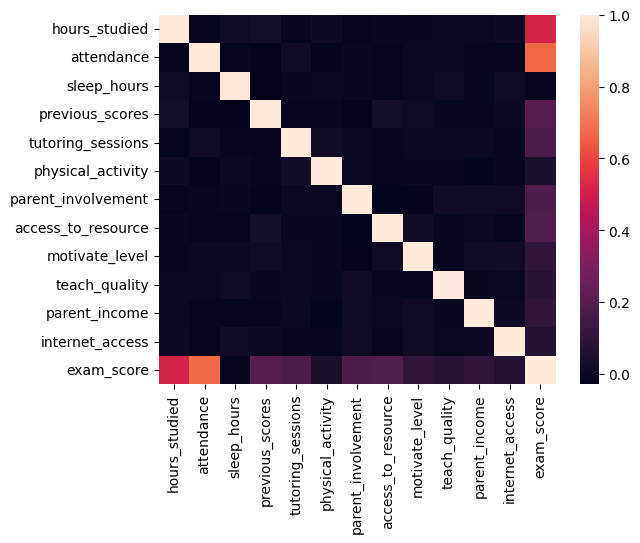

In [53]:
dataplot = sb.heatmap(data.corr(numeric_only=True))
mp.show()

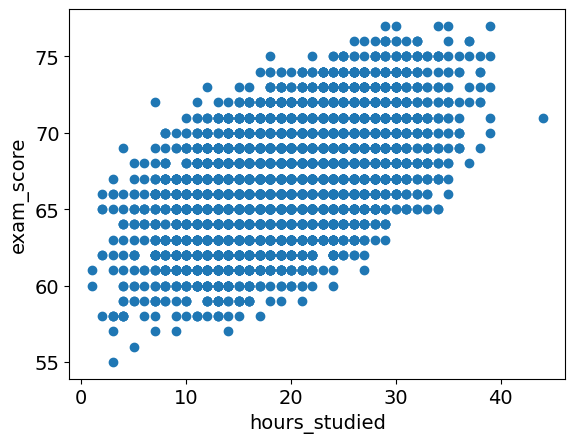

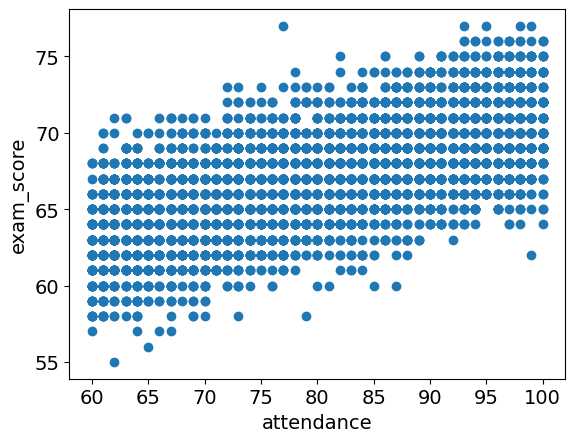

In [50]:



x = data[['hours_studied', 'attendance']]
y = data['exam_score']


plt.tight_layout()
plt.scatter(data[['hours_studied']],y)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('hours_studied', fontsize=14)
plt.ylabel('exam_score',fontsize=14)
plt.show()



plt.tight_layout()
plt.scatter(data[['attendance']],y)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('attendance', fontsize=14)
plt.ylabel('exam_score',fontsize=14)
plt.show()

In [42]:
x

,hours_studied,attendance
0,23,84
1,19,64
2,24,98
3,29,89
4,19,92
...,...,...
6602,25,69
6603,23,76
6604,20,90
6605,10,86


In [43]:
y

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: exam_score, Length: 6552, dtype: int64

In [44]:
# split into test train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 16)

# train the model
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(x_test)


In [52]:
print('R squared: {:.2f}'.format(model.score(x_test,y_test)*100))

R squared: 74.14
